# Compare the information extraction results of IATA and NOTAM data

As the same information extraction rules were used to extract the restrictions imposed on foreign countries from both IATA and NOTAM data, we compare the results to determine the effectiveness of the rules

### Goal

Validation of information extraction rules used to extract foreign country restriction information

#### Input

- Timeline of restrictions obtained using NOTAM data (country_closure_timeline.csv obtained using ws2_snr_NOTAMs_country_level_restrictions_timeline.ipynb)


- Timeline of restrictions obtained using IATA data (iata_country_closure_timeline.csv obtained using ws2_snr_humdata_country_level_restrictions_timeline.ipynb)

#### Output

- Effectiveness of the information extraction rules


#### Steps taken:

1. Read the restriction timeline files determined using IATA and NOTAM data
2. Identify the common 'home' and 'other' countries present in both the dataframes
3. Compare the 'restriction' column and plot the results

In [79]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

* Read the restriction timeline files determined using IATA and NOTAM data

In [2]:
notams_df = pd.read_csv("/project_data/data_asset/country_closure_timeline.csv")

In [3]:
iata_df = pd.read_csv("/project_data/data_asset/iata_country_closure_timeline.csv")

* Identify the common 'home' and 'other' countries present in both the dataframes

In [5]:
common_home_countries = set(notams_df.home.unique()).intersection(set(iata_df.home.unique()))

In [50]:
filt_notams_df = notams_df[(notams_df.home.isin(list(common_home_countries)))&
                          (~notams_df.restriction.isna())][["home","other","restriction","active_week"]].reset_index(drop=True)

In [51]:
filt_iata_df = iata_df[(iata_df.home.isin(list(common_home_countries)))&
                      (~iata_df.restriction.isna())][["home","other","restriction","active_week"]].reset_index(drop=True)

In [52]:
common_home_other = filt_iata_df.merge(filt_notams_df,how='inner', left_on=['home','other','active_week'],right_on=['home','other','active_week'])

In [60]:
common_home_other.head()

,home,other,restriction_x,active_week,restriction_y,restriction_diff
0,AUS,AUS,4.0,32,4.0,0.0
1,AUS,XYZ,0.0,32,0.0,0.0
2,AUT,ABW,0.0,32,0.0,0.0
3,AUT,AFG,0.0,32,0.0,0.0
4,AUT,AGO,0.0,32,0.0,0.0


* Compare the 'restriction' column and plot the results

The restriction levels used are given below:

    4 - home
    3 - open
    2 - restriction level not known - mention of country
    1 - restriction level not known - mention of EU/third country
    0 - close

The column 'restriction_x' corresponds to the restriction level determined from IATA data and the column 'restriction_y' corresponds to the restriction level determined from NOTAM data

We compute the difference between these two columns in order to validate the accuracy of the information extraction rules.


In [63]:
common_home_other['restriction_diff']= abs(common_home_other['restriction_x'] - common_home_other['restriction_y'])

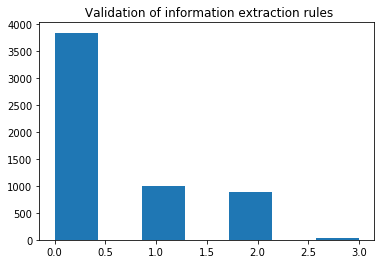

In [76]:
plt.hist(common_home_other.restriction_diff, bins=7)
plt.title(" Validation of information extraction rules")
plt.show()

In [87]:
np.histogram(common_home_other.restriction_diff, bins=[0,1,2,3,4], density=True)

(array([0.66580042, 0.17376992, 0.15349965, 0.00693001]),
 array([0, 1, 2, 3, 4]))

**Interpretation of the results:**

* Same restriction level was achieved in 66.5% of the cases

* In  32.7% (17.37% + 15.3%) of the cases, the restriciton level determined as open/close in one data source was determined as "restriction not clear" in the other data source

* In 0.6% of the cases, the restriction level determined as open in one data source was determined as close in the other data source. 


Based on the above results, in 0.6% of the cases the information extraction rules are contradicting the information extracted from the two sources. This shows that the rules are quite effective in getting an overview of the foreign country restriciton from either IATA or NOTAM data

In [65]:
common_home_other.restriction_diff.unique()

array([0., 2., 1., 3.])

In [ ]:
common_home_other[common_home_other.restriction_diff==-3]

In [53]:
len(common_home_other)

5772

**Author**

* Shri Nishanth Rajendran - AI Development Specialist, R² Data Labs, Rolls Royce

